In [1]:
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import gridspec

with netCDF4.Dataset("../eb-cc/ftop/STEP_SPP_001_EBCC_ftop.nc", "r") as db:
    rho_tor_norm = db["core_profiles/0"]["profiles_1d.grid.rho_tor_norm"][0]
    T_e = db["core_profiles/0"]["profiles_1d.electrons.temperature"][0]
    n_e = db["core_profiles/0"]["profiles_1d.electrons.density"][0]
    T_i_avg = db["core_profiles/0"]["profiles_1d.t_i_average"][0]
    n_i_thermal = db["core_profiles/0"]["profiles_1d.n_i_thermal_total"][0]
    Z_eff = db["core_profiles/0"]["profiles_1d.zeff"][0]
    j_total = db["core_profiles/0"]["profiles_1d.j_total"][0]
    j_bootstrap = db["core_profiles/0"]["profiles_1d.j_bootstrap"][0]
    j_ec = db["core_profiles/0"]["profiles_1d.j_non_inductive"][0] - j_bootstrap
    q = db["core_profiles/0"]["profiles_1d.q"][0]
    # For chi, 0 is the combined output
    chi_e = db["core_transport/0"]["model.profiles_1d.electrons.energy.d"][0][0]
    chi_i = db["core_transport/0"]["model.profiles_1d.total_ion_energy.d"][0][0]

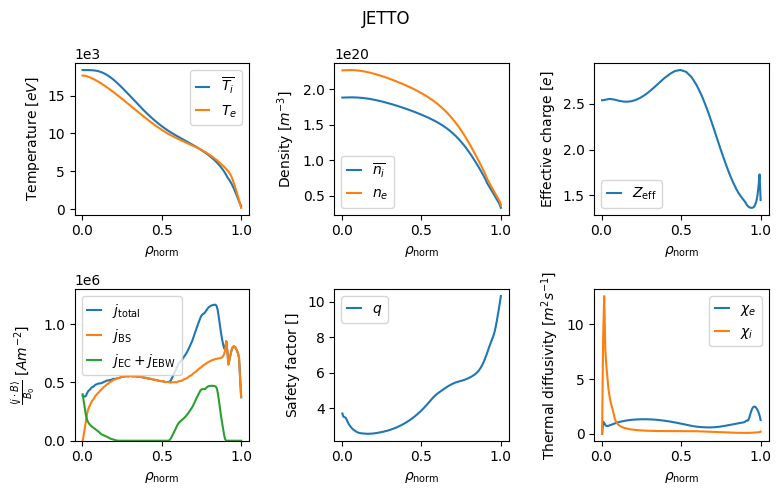

In [2]:
plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(2, 3)

ax1 = plt.subplot(gs[0, 0])
plt.plot(rho_tor_norm, T_i_avg, label=r"$\overline{T_i}$")
plt.plot(rho_tor_norm, T_e, label=r"$T_e$")
plt.xlabel(r"$\rho_\mathrm{norm}$")
plt.ylabel(r"Temperature $[eV]$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(3, 3))
plt.legend(handlelength=1)

ax2 = plt.subplot(gs[0, 1])
plt.plot(rho_tor_norm, n_i_thermal, label=r"$\overline{n_i}$")
plt.plot(rho_tor_norm, n_e, label=r"$n_e$")
plt.xlabel(r"$\rho_\mathrm{norm}$")
plt.ylabel(r"Density $[m^{-3}]$")
plt.legend(handlelength=1)

ax3 = plt.subplot(gs[0, 2])
plt.plot(rho_tor_norm, Z_eff, label=r"$Z_\mathrm{eff}$")
plt.xlabel(r"$\rho_\mathrm{norm}$")
plt.ylabel(r"Effective charge $[e]$")
plt.legend(handlelength=1)

ax3 = plt.subplot(gs[1, 0])
plt.plot(rho_tor_norm, j_total, label=r"$j_\mathrm{total}$")
plt.plot(rho_tor_norm, j_bootstrap, label=r"$j_\mathrm{BS}$")
plt.plot(rho_tor_norm, j_ec, label=r"$j_\mathrm{EC} + j_\mathrm{EBW}$")
plt.xlabel(r"$\rho_\mathrm{norm}$")
plt.ylabel(r"$\frac{\langle j \cdot B \rangle}{B_0}$ $[Am^{-2}]$")
plt.legend(handlelength=1)
plt.ylim(0, 1.3e6)

ax3 = plt.subplot(gs[1, 1])
plt.plot(rho_tor_norm, q, label=r"$q$")
plt.xlabel(r"$\rho_\mathrm{norm}$")
plt.ylabel(r"Safety factor $[]$")
plt.legend(handlelength=1)

ax4 = plt.subplot(gs[1, 2])
plt.plot(rho_tor_norm, chi_e, label=r"$\chi_e$")
plt.plot(rho_tor_norm, chi_i, label=r"$\chi_i$")
plt.xlabel(r"$\rho_\mathrm{norm}$")
plt.ylabel(r"Thermal diffusivity $[m^2 s^{-1}]$")
plt.legend(handlelength=1)

plt.suptitle("JETTO")
plt.tight_layout()
plt.savefig("ftop.png", dpi=1000)